In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')
sys.path.insert(0, "../0.data-download/scripts/")
from data_loader import load_data, load_train_test_data

In [2]:
# data path
data_directory = "../0.data-download/data/"

In [3]:
# load the training data 
data = load_train_test_data(data_directory, train_or_test = "all", stats=False)
dfs = data[0]
dfs_test = data[1]

In [4]:
# set a unique dataframe that can be appended from
training_df_age = dfs

# group by age and create new dataframes that can be appended to
groups = training_df_age.groupby("age_and_sex")
adult_dependency_df = pd.DataFrame()
ped_dependency_df = pd.DataFrame()
for name, training_df_age in groups:
    
    # append rows that contain Adult samples (male or female) to the new adult dependency dataframe
    if name == "Adult_Male" or name == "Adult_Female" or name == "Adult_nan":
        adult_dependency_df = adult_dependency_df.append(training_df_age)
        adult_dependency_df = adult_dependency_df.reset_index(drop=True)
        
    # append rows that contain Pediatric samples (male ore female) to the new pediatric dataframe
    else :
        ped_dependency_df = ped_dependency_df.append(training_df_age)
        ped_dependency_df = ped_dependency_df.reset_index(drop=True)           

In [5]:
# set a unique dataframe that can be appended from
training_df_sex = dfs

# group by sex and create new dataframes to be appended to 
groups_sex = training_df_sex.groupby("age_and_sex")
male_dependency_df = pd.DataFrame()
female_dependency_df = pd.DataFrame()
for name, training_df_sex in groups_sex:
    
    # append rows that contain Male samples (Adult or Pediatric) to the new male dependency dataframe and filter out samples that contain no gender info
    if name == "Adult_Male" or name == "Pediatric_Male" and name != "Pediatric_nan" and name != "Adult_nan":
        male_dependency_df = male_dependency_df.append(training_df_sex)
        male_dependency_df = male_dependency_df.reset_index(drop=True)
        
    # append rows that contain Female samples (Adult or Pediatric) to the new female dependency dataframe and filter out samples that contain no gender info
    elif name == "Adult_Female" or name == "Pediatric_Female" and name != "Pediatric_nan" and name != "Adult_nan":
        female_dependency_df = female_dependency_df.append(training_df_sex)
        female_dependency_df = female_dependency_df.reset_index(drop=True)          

In [6]:
print(adult_dependency_df.shape)
adult_dependency_df.head(3)

(648, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-002023,0.036767,0.029107,0.023726,0.032104,0.050232,0.057796,0.073494,0.185230,0.024989,...,0.145078,0.225307,0.442737,0.089122,0.061745,0.084042,0.033353,0.069443,0.475432,Adult_Female
1,ACH-001443,0.024582,0.015618,0.060351,0.008355,0.128603,0.273328,0.125850,0.303393,0.024534,...,0.891340,0.498383,0.849125,0.002853,0.027754,0.144118,0.010066,0.023043,0.316779,Adult_Female
2,ACH-000805,0.011637,0.035847,0.030944,0.004527,0.119017,0.051007,0.045971,0.671822,0.225975,...,0.174094,0.172765,0.844238,0.035642,0.126908,0.152868,0.135412,0.068852,0.665546,Adult_Female


In [7]:
print(ped_dependency_df.shape)
ped_dependency_df.head(3)

(103, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-002471,0.018303,0.019467,0.013715,0.005852,0.028662,0.059202,0.014625,0.220025,0.033027,...,0.102334,0.015718,0.517607,0.156558,0.029729,0.212544,0.095469,0.158603,0.120217,Pediatric_Female
1,ACH-001765,0.035732,0.056139,0.033138,0.036596,0.105666,0.024046,0.088349,0.131495,0.085116,...,0.061601,0.367502,0.583884,0.029482,0.008982,0.102599,0.014387,0.108231,0.167232,Pediatric_Female
2,ACH-000364,0.068867,0.002028,0.018581,0.035064,0.113450,0.044967,0.005925,0.366189,0.042005,...,0.504015,0.212549,0.860505,0.043218,0.167814,0.049792,0.008253,0.240096,0.598176,Pediatric_Female


In [8]:
print(male_dependency_df.shape)
male_dependency_df.head(3)

(423, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000822,0.037779,0.035940,0.014023,0.014884,0.093606,0.046031,0.015361,0.336440,0.044045,...,0.199975,0.075425,0.930082,0.027703,0.044858,0.209492,0.040384,0.058936,0.281196,Adult_Male
1,ACH-000054,0.121542,0.033057,0.034461,0.023655,0.067816,0.030282,0.033054,0.013902,0.027737,...,0.618865,0.126937,0.877066,0.022854,0.089039,0.062127,0.037931,0.037812,0.291740,Adult_Male
2,ACH-000115,0.166098,0.026557,0.056788,0.019573,0.127481,0.053332,0.015325,0.038566,0.043611,...,0.301632,0.022844,0.583423,0.114499,0.087140,0.048662,0.035922,0.304547,0.363692,Adult_Male


In [9]:
print(female_dependency_df.shape)
female_dependency_df.head(3)

(323, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-002023,0.036767,0.029107,0.023726,0.032104,0.050232,0.057796,0.073494,0.185230,0.024989,...,0.145078,0.225307,0.442737,0.089122,0.061745,0.084042,0.033353,0.069443,0.475432,Adult_Female
1,ACH-001443,0.024582,0.015618,0.060351,0.008355,0.128603,0.273328,0.125850,0.303393,0.024534,...,0.891340,0.498383,0.849125,0.002853,0.027754,0.144118,0.010066,0.023043,0.316779,Adult_Female
2,ACH-000805,0.011637,0.035847,0.030944,0.004527,0.119017,0.051007,0.045971,0.671822,0.225975,...,0.174094,0.172765,0.844238,0.035642,0.126908,0.152868,0.135412,0.068852,0.665546,Adult_Female


In [10]:
#drop the string values from all dataframes
adult_dependency_df_float = adult_dependency_df.drop(columns= ["DepMap_ID", "age_and_sex"])
ped_dependency_df_float =ped_dependency_df.drop(columns= ["DepMap_ID", "age_and_sex"])

male_dependency_df_float = male_dependency_df.drop(columns= ["DepMap_ID", "age_and_sex"])
female_dependency_df_float =female_dependency_df.drop(columns= ["DepMap_ID", "age_and_sex"])

dependency_df = dfs.drop(columns= "age_and_sex")
dependency_df = dependency_df.set_index("DepMap_ID")

In [11]:
# t_test comparing gene dependencies in adult vs pediatric samples
t_test = ttest_ind(adult_dependency_df_float, ped_dependency_df_float)
t_test = pd.DataFrame(t_test).T
t_test.columns = ['t_stat', 'p_value']
print(t_test.shape)
t_test.head(3)

(16708, 2)


,t_stat,p_value
0,-1.109761,0.267458
1,0.839726,0.401330
2,2.113488,0.034889


In [12]:
# t_test comparing gene dependencies in male vs female samples
t_test_sex = ttest_ind(male_dependency_df_float, female_dependency_df_float)
t_test_sex = pd.DataFrame(t_test_sex).T
t_test_sex.columns = ['t_stat', 'p_value']
print(t_test_sex.shape)
t_test_sex.head(3)

(16708, 2)


,t_stat,p_value
0,-0.461742,0.644401
1,-0.172818,0.862841
2,-1.096839,0.273066


In [14]:
print(dependency_df.shape)
dependency_df.head(3)

(751, 16708)


,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZUP1 (221302),ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000822,0.037779,0.035940,0.014023,0.014884,0.093606,0.046031,0.015361,0.336440,0.044045,0.030419,...,0.227688,0.199975,0.075425,0.930082,0.027703,0.044858,0.209492,0.040384,0.058936,0.281196
ACH-000054,0.121542,0.033057,0.034461,0.023655,0.067816,0.030282,0.033054,0.013902,0.027737,0.022206,...,0.058821,0.618865,0.126937,0.877066,0.022854,0.089039,0.062127,0.037931,0.037812,0.291740
ACH-000115,0.166098,0.026557,0.056788,0.019573,0.127481,0.053332,0.015325,0.038566,0.043611,0.013618,...,0.069164,0.301632,0.022844,0.583423,0.114499,0.087140,0.048662,0.035922,0.304547,0.363692


In [15]:
# calculate variance of each gene then send the results plus the gene info into a new dataframe
variance = dependency_df.var()
variance_list = variance.tolist()
column_names = ['variance']
variance_df = pd.DataFrame(variance, columns= column_names)
variance_df = variance_df.sort_index(ascending=True).reset_index()
variance_df = variance_df.rename(columns= {"index":"gene_ID"})
print(variance_df.shape)
variance_df.head(3)

(16708, 2)


,gene_ID,variance
0,A1BG (1),0.003768
1,A1CF (29974),0.003290
2,A2M (2),0.000639


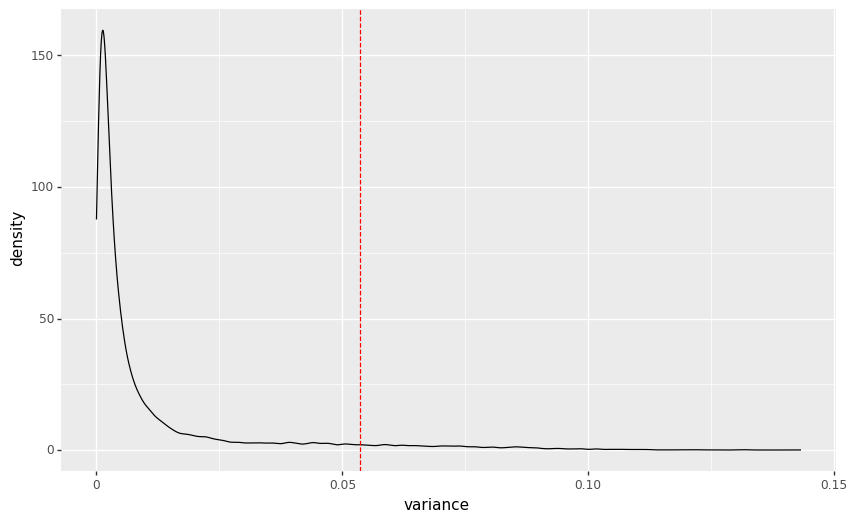

<ggplot: (8779271759215)>

In [16]:
# finding the smallest gene variation out of the 1000 largest gene variations to set the top 1000 gene variances threshold
n = variance_df["variance"].nlargest(1000)
variance_theshold = n.min().astype(float)

# plotting variance density chart and marking the 1000 largest gene variation cutoff
variance_density_plot = (p9.ggplot(variance_df, p9.aes(x = 'variance')) 
                         + p9.geom_density() 
                         + p9.geom_vline(xintercept = variance_theshold, linetype = "dashed", color = "red") 
                         + p9.theme(figure_size = (10,6))
                         )

# save the figure
density_path = pathlib.Path("./figures/variance_density_plot.png")
variance_density_plot.save(density_path)
variance_density_plot

In [17]:
# first create new dataframe containing gene info as well as both adult-pediatric and male-female t-test results and variance results
df = variance_df.assign(ttest_A_vs_P = t_test.t_stat.astype(float), ttest_M_vs_F = t_test_sex.t_stat.astype(float)) 

# and save the new dataframe as a .csv
testing_df_output = pathlib.Path("../0.data-download/data/genes_variances_and_t-tests_df.csv")
df.to_csv(testing_df_output, index = False)
print(df.shape)
df.head(3)

(16708, 4)


,gene_ID,variance,ttest_A_vs_P,ttest_M_vs_F
0,A1BG (1),0.003768,-1.109761,-0.461742
1,A1CF (29974),0.003290,0.839726,-0.172818
2,A2M (2),0.000639,2.113488,-1.096839


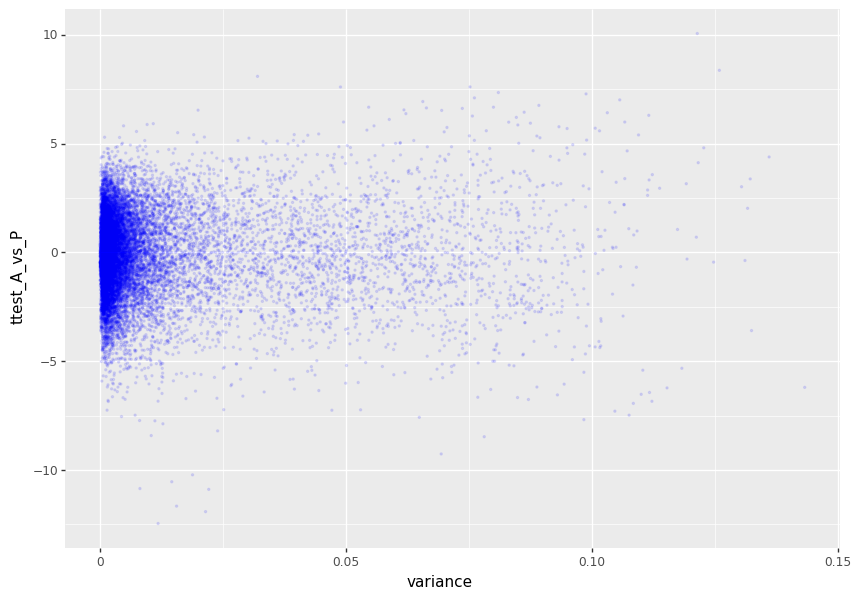

<ggplot: (8779271945697)>

In [18]:
# plot adult-pediatric ttest versus variance
A_vs_P_by_variance_plot = (p9.ggplot(data = df, mapping = p9.aes(x = 'variance', y = 'ttest_A_vs_P')) 
                           + p9.geom_point(size = 0.4, alpha = 0.1, color = 'blue') 
                           + p9.theme(figure_size = (10,7))
                           )

# save the figure
adult_vs_pediatric_path = pathlib.Path("./figures/adult-pediatric_ttest_vs_variance.png")
A_vs_P_by_variance_plot.save(adult_vs_pediatric_path)
A_vs_P_by_variance_plot

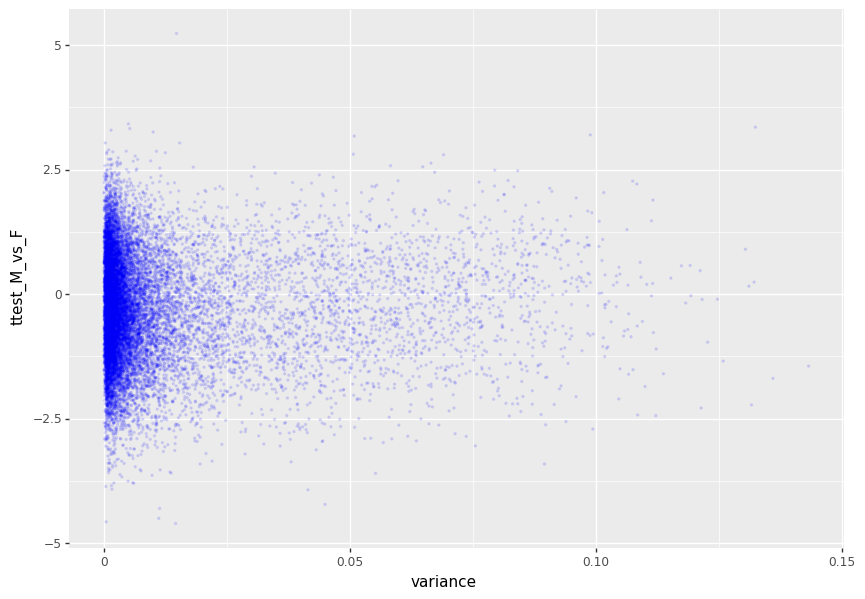

<ggplot: (8779275571083)>

In [19]:
# plot male-female ttest versus gene variance
M_vs_F_by_variance_plot = (p9.ggplot(data = df, mapping = p9.aes(x = 'variance', y = 'ttest_M_vs_F')) 
                           + p9.geom_point(size = 0.4, alpha = 0.1, color = 'blue') 
                           + p9.theme(figure_size = (10,7))
                           )

# save the figure
male_vs_female_path = pathlib.Path("./figures/male-female_ttest_vs_variance.png")
M_vs_F_by_variance_plot.save(male_vs_female_path)
M_vs_F_by_variance_plot